In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

sb.set()

### Gym Members Dataset

#### Import Gym Members Dataset

In [2]:
exercise_df = pd.read_csv('../datasets/gym_members_exercise_tracking.csv')

exercise_df.rename(columns={'Weight (kg)':'Weight',
                            'Height (m)':'Height',
                            'Session_Duration (hours)':'Duration',
                            'Water_Intake (liters)':'Water_Intake',
                            'Workout_Frequency (days/week)':'Frequency'},
                            inplace=True)

exercise_df.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Frequency,Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [3]:
print('Data Type: ', type(exercise_df))
print('Data Dimension: ', exercise_df.shape)

Data Type:  <class 'pandas.core.frame.DataFrame'>
Data Dimension:  (973, 15)


In [4]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               973 non-null    int64  
 1   Gender            973 non-null    object 
 2   Weight            973 non-null    float64
 3   Height            973 non-null    float64
 4   Max_BPM           973 non-null    int64  
 5   Avg_BPM           973 non-null    int64  
 6   Resting_BPM       973 non-null    int64  
 7   Duration          973 non-null    float64
 8   Calories_Burned   973 non-null    float64
 9   Workout_Type      973 non-null    object 
 10  Fat_Percentage    973 non-null    float64
 11  Water_Intake      973 non-null    float64
 12  Frequency         973 non-null    int64  
 13  Experience_Level  973 non-null    int64  
 14  BMI               973 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 114.2+ KB


In [5]:
exercise_df.describe()

,Age,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Duration,Calories_Burned,Fat_Percentage,Water_Intake,Frequency,Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [6]:
for column in exercise_df.columns:
    print("{} (unique values) : {}".format(column, len(exercise_df[column].unique())))

Age (unique values) : 42
Gender (unique values) : 2
Weight (unique values) : 532
Height (unique values) : 51
Max_BPM (unique values) : 40
Avg_BPM (unique values) : 50
Resting_BPM (unique values) : 25
Duration (unique values) : 147
Calories_Burned (unique values) : 621
Workout_Type (unique values) : 4
Fat_Percentage (unique values) : 239
Water_Intake (unique values) : 23
Frequency (unique values) : 4
Experience_Level (unique values) : 3
BMI (unique values) : 771


#### Data Inspection and Feature Engineering

In [7]:
# check if everyone has the right BMI based on weight and height values
incorrect_bmi_rows = []

for index, row in exercise_df.iterrows():
    if row['BMI'] != round(row['Weight']/(row['Height']**2),2):
        incorrect_bmi_rows.append(index)

incorrect_bmi_rows

# all the BMI recorded are correct

[]

In [8]:
# dropping experience level as it is an arbitraury value that may not be the same comparison or scale for everyone

exercise_df = exercise_df.drop(columns=['Experience_Level'])

exercise_df.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Frequency,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,14.39


In [9]:
intensity_level = {
    'Yoga':'Low',
    'Cardio':'Mid',
    'HIIT':'High',
    'Strength':'High'
}

exercise_df['Intensity'] = exercise_df['Workout_Type'].map(intensity_level)

exercise_df.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Frequency,BMI,Intensity
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,30.20,Low
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,32.00,High
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,24.71,Mid
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,18.41,High
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,14.39,High


In [10]:
# rate 1-5 for fitness index score for each of the following category

# Underweight (<18.5) = Score 1
# Normal (18.5 - 24.9) = Score 5
# Overweight (25 - 29.9) = Score 3
# Obesity (30 - 34.9) = Score 2
# Morbid Obesity (>35) = Score 1

for index, row in exercise_df.iterrows():
    if row['BMI'] < 18.5:
        exercise_df.loc[index, 'BMI_score'] = 1
    elif row['BMI'] >= 18.5 or row['BMI'] <= 24.9:
        exercise_df.loc[index, 'BMI_score'] = 5
    elif row['BMI'] >= 25 or row['BMI'] <= 29.9:
        exercise_df.loc[index, 'BMI_score'] = 3
    elif row['BMI'] >= 30 or row['BMI'] <= 34.9:
        exercise_df.loc[index, 'BMI_score'] = 2
    else:
        exercise_df.loc[index, 'BMI_score'] = 1

exercise_df.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Frequency,BMI,Intensity,BMI_score
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,30.20,Low,5.0
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,32.00,High,5.0
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,24.71,Mid,5.0
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,18.41,High,1.0
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,14.39,High,1.0


In [11]:
# Healthy resting heart rate is between 50-100 heartbeats per min

for index, row in exercise_df.iterrows():
    if row['Resting_BPM'] < 60:
        exercise_df.loc[index, 'Resting_BPM_score'] = 1 
    elif row['Resting_BPM'] >= 60 and row['Resting_BPM'] <= 80:
        exercise_df.loc[index, 'Resting_BPM_score'] = 5  
    elif row['Resting_BPM'] > 80 and row['Resting_BPM'] <= 100:
        exercise_df.loc[index, 'Resting_BPM_score'] = 3 
    elif row['Resting_BPM'] > 100:
        exercise_df.loc[index, 'Resting_BPM_score'] = 2

exercise_df.head()


,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Frequency,BMI,Intensity,BMI_score,Resting_BPM_score
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,30.20,Low,5.0,5.0
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,32.00,High,5.0,5.0
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,24.71,Mid,5.0,1.0
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,18.41,High,1.0,1.0
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,14.39,High,1.0,5.0


In [12]:
# age      max heart rate
# 25            195
# 35            185
# 45            175
# 55            165
# 65            155

# Low: 57-63% of max heartbeat
# Mid: 64-76% of max heartbeat
# High: 77-95% of max heartbeat

age_max_hr = {
    25:195,
    35:185,
    45:175,
    55:165,
    65:155
}

def get_max_hr_by_age(age):
    for age_range, max_hr in age_max_hr.items():
        if age <= age_range:
            return max_hr
    return 155

def calculate_avg_bpm_score(avg_bpm, max_hr, intensity_level):
    intensity_range = {
        'Low': (0.57*max_hr, 0.63*max_hr),
        'Mid': (0.64*max_hr, 0.76*max_hr),
        'High': (0.77*max_hr, 0.95*max_hr)
    }

    min_bpm, max_bpm = intensity_range[intensity_level]

    return 5 if min_bpm <= avg_bpm and avg_bpm <= max_bpm else 1

exercise_df['Avg_BPM_score'] = exercise_df.apply(
    lambda row: calculate_avg_bpm_score(row['Avg_BPM'], get_max_hr_by_age(row['Age']), row['Intensity']),
    axis=1
)

exercise_df.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Frequency,BMI,Intensity,BMI_score,Resting_BPM_score,Avg_BPM_score
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,30.20,Low,5.0,5.0,1
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,32.00,High,5.0,5.0,5
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,24.71,Mid,5.0,1.0,5
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,18.41,High,1.0,1.0,5
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,14.39,High,1.0,5.0,5


In [13]:
exercise_df['avg_calories_burned'] = round(exercise_df['Calories_Burned'] / (exercise_df['Duration'] * 60),2)

exercise_df.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Frequency,BMI,Intensity,BMI_score,Resting_BPM_score,Avg_BPM_score,avg_calories_burned
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,30.20,Low,5.0,5.0,1,12.95
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,32.00,High,5.0,5.0,5,11.32
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,24.71,Mid,5.0,1.0,5,10.17
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,18.41,High,1.0,1.0,5,15.03
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,14.39,High,1.0,5.0,5,14.48


In [14]:
exercise_df['heart_rate_reserve'] = exercise_df['Max_BPM']-exercise_df['Resting_BPM']

exercise_df.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Frequency,BMI,Intensity,BMI_score,Resting_BPM_score,Avg_BPM_score,avg_calories_burned,heart_rate_reserve
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,30.20,Low,5.0,5.0,1,12.95,120
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,32.00,High,5.0,5.0,5,11.32,113
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,24.71,Mid,5.0,1.0,5,10.17,113
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,18.41,High,1.0,1.0,5,15.03,134
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,14.39,High,1.0,5.0,5,14.48,120


In [15]:
exercise_df['heart_rate_recovery'] = round((exercise_df['Avg_BPM']-exercise_df['Resting_BPM']) / (exercise_df['Duration'] * 60),2)

exercise_df.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Duration,Calories_Burned,Workout_Type,...,Water_Intake,Frequency,BMI,Intensity,BMI_score,Resting_BPM_score,Avg_BPM_score,avg_calories_burned,heart_rate_reserve,heart_rate_recovery
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,...,3.5,4,30.20,Low,5.0,5.0,1,12.95,120,0.96
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,...,2.1,4,32.00,High,5.0,5.0,5,11.32,113,1.09
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,...,2.3,4,24.71,Mid,5.0,1.0,5,10.17,113,1.02
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,...,2.1,3,18.41,High,1.0,1.0,5,15.03,134,3.05
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,...,2.8,3,14.39,High,1.0,5.0,5,14.48,120,2.34


In [16]:
exercise_df['perceived_intensity'] = round(((exercise_df['Avg_BPM'] / exercise_df['Max_BPM']) * 100), 2)

exercise_df.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Duration,Calories_Burned,Workout_Type,...,Frequency,BMI,Intensity,BMI_score,Resting_BPM_score,Avg_BPM_score,avg_calories_burned,heart_rate_reserve,heart_rate_recovery,perceived_intensity
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,...,4,30.20,Low,5.0,5.0,1,12.95,120,0.96,87.22
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,...,4,32.00,High,5.0,5.0,5,11.32,113,1.09,84.36
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,...,4,24.71,Mid,5.0,1.0,5,10.17,113,1.02,73.05
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,...,3,18.41,High,1.0,1.0,5,15.03,134,3.05,86.32
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,...,3,14.39,High,1.0,5.0,5,14.48,120,2.34,84.04


In [17]:
exercise_df['fitness_composite_score'] = round(exercise_df[['BMI_score', 'Resting_BPM_score', 'Avg_BPM_score']].mean(axis=1),2)
exercise_df = exercise_df.drop(columns=['BMI_score', 'Resting_BPM_score', 'Avg_BPM_score'])

exercise_df.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Frequency,BMI,Intensity,avg_calories_burned,heart_rate_reserve,heart_rate_recovery,perceived_intensity,fitness_composite_score
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,30.20,Low,12.95,120,0.96,87.22,3.67
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,32.00,High,11.32,113,1.09,84.36,5.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,24.71,Mid,10.17,113,1.02,73.05,3.67
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,18.41,High,15.03,134,3.05,86.32,2.33
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,14.39,High,14.48,120,2.34,84.04,3.67


#### Exploratory Analysis

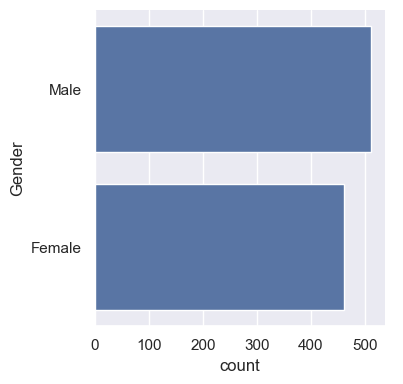

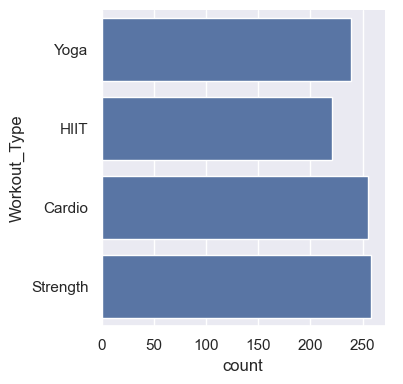

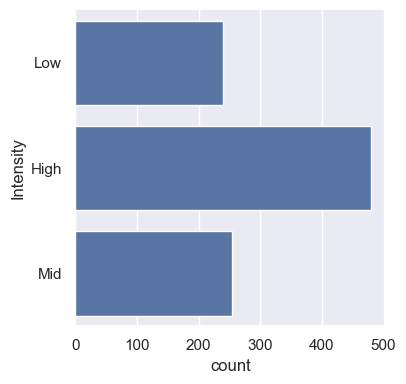

In [19]:
one_hot_columns=['Gender', 'Workout_Type', 'Intensity']

exercise_df_categorical=pd.DataFrame(exercise_df[one_hot_columns])

for cols in exercise_df_categorical:
    sb.catplot(y=cols, data=exercise_df_categorical, kind="count", height=4)

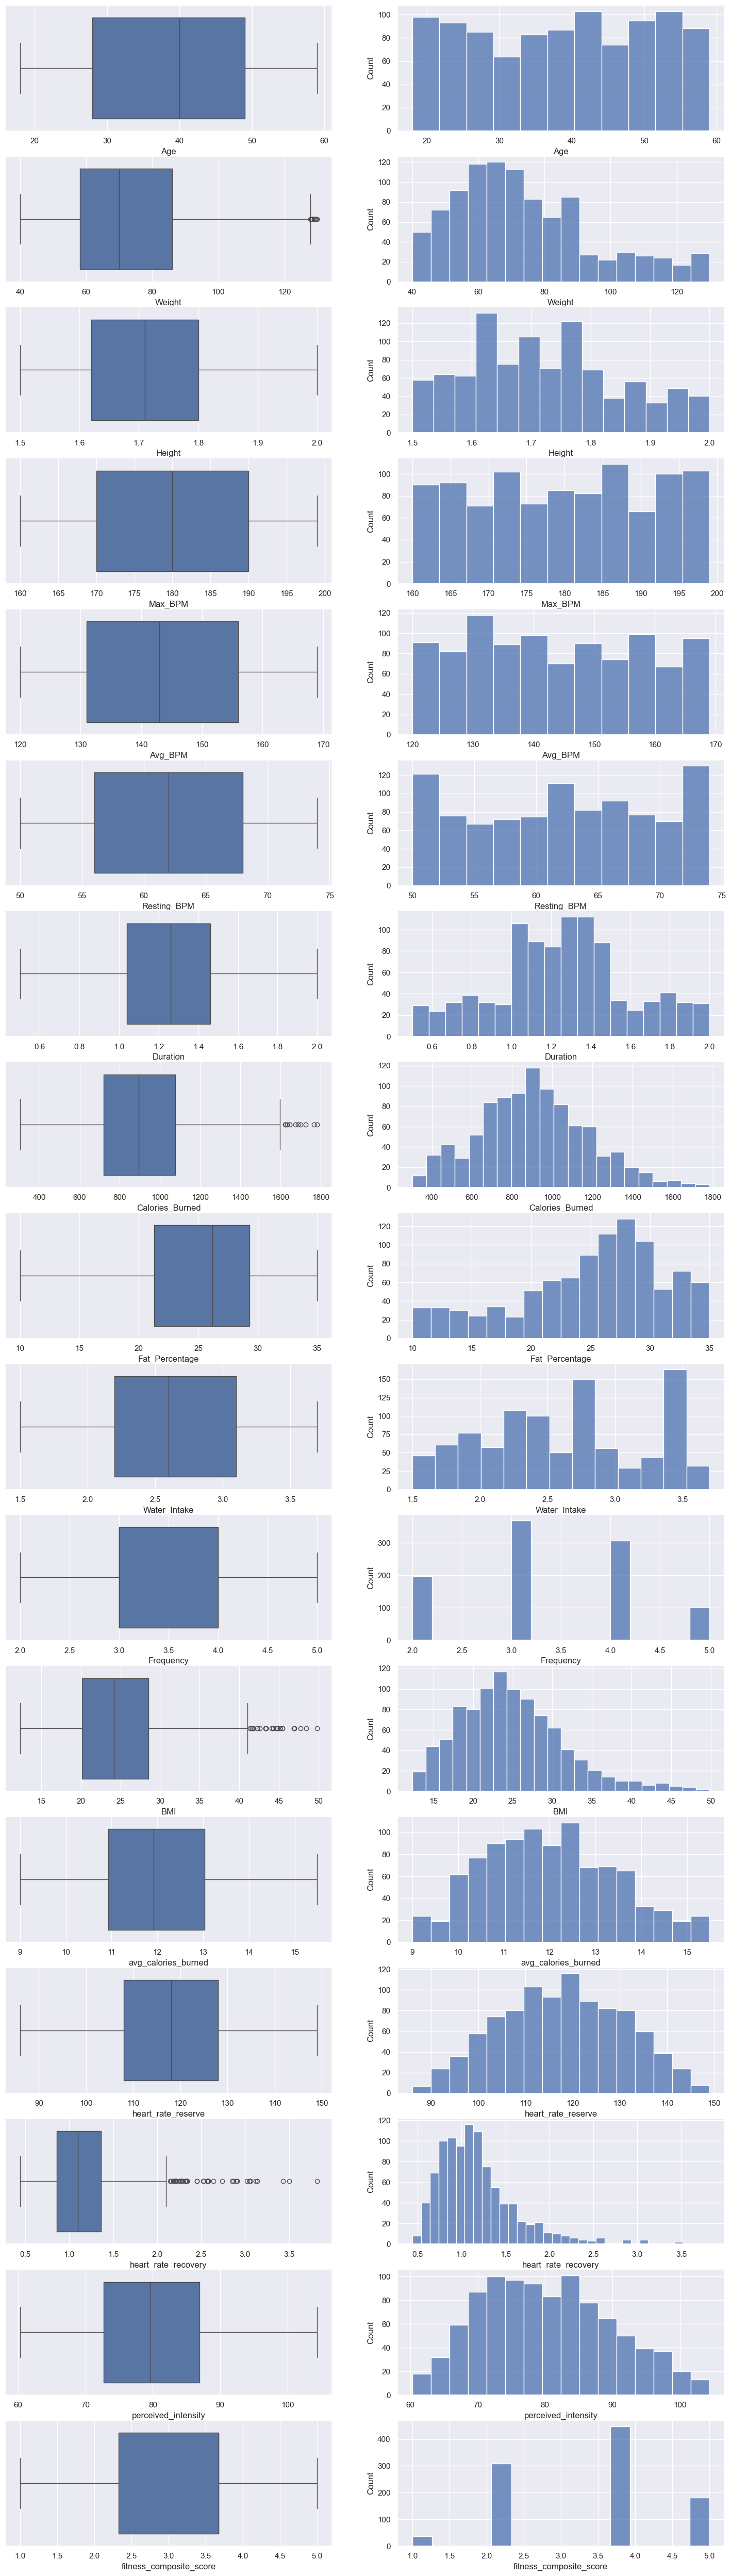

In [20]:
numerical_columns = [cols for cols in exercise_df if cols not in one_hot_columns]
exercise_df_numerical = pd.DataFrame(exercise_df[numerical_columns])

f, axes = plt.subplots(len(numerical_columns), 2, figsize=(18, 64))

count = 0
for var in exercise_df_numerical.iloc[:]:
    sb.boxplot(exercise_df_numerical.iloc[:][var], orient = "h", ax = axes[count,0])
    sb.histplot(exercise_df_numerical.iloc[:][var], ax = axes[count,1])
    count += 1

#### Outliers Transformation

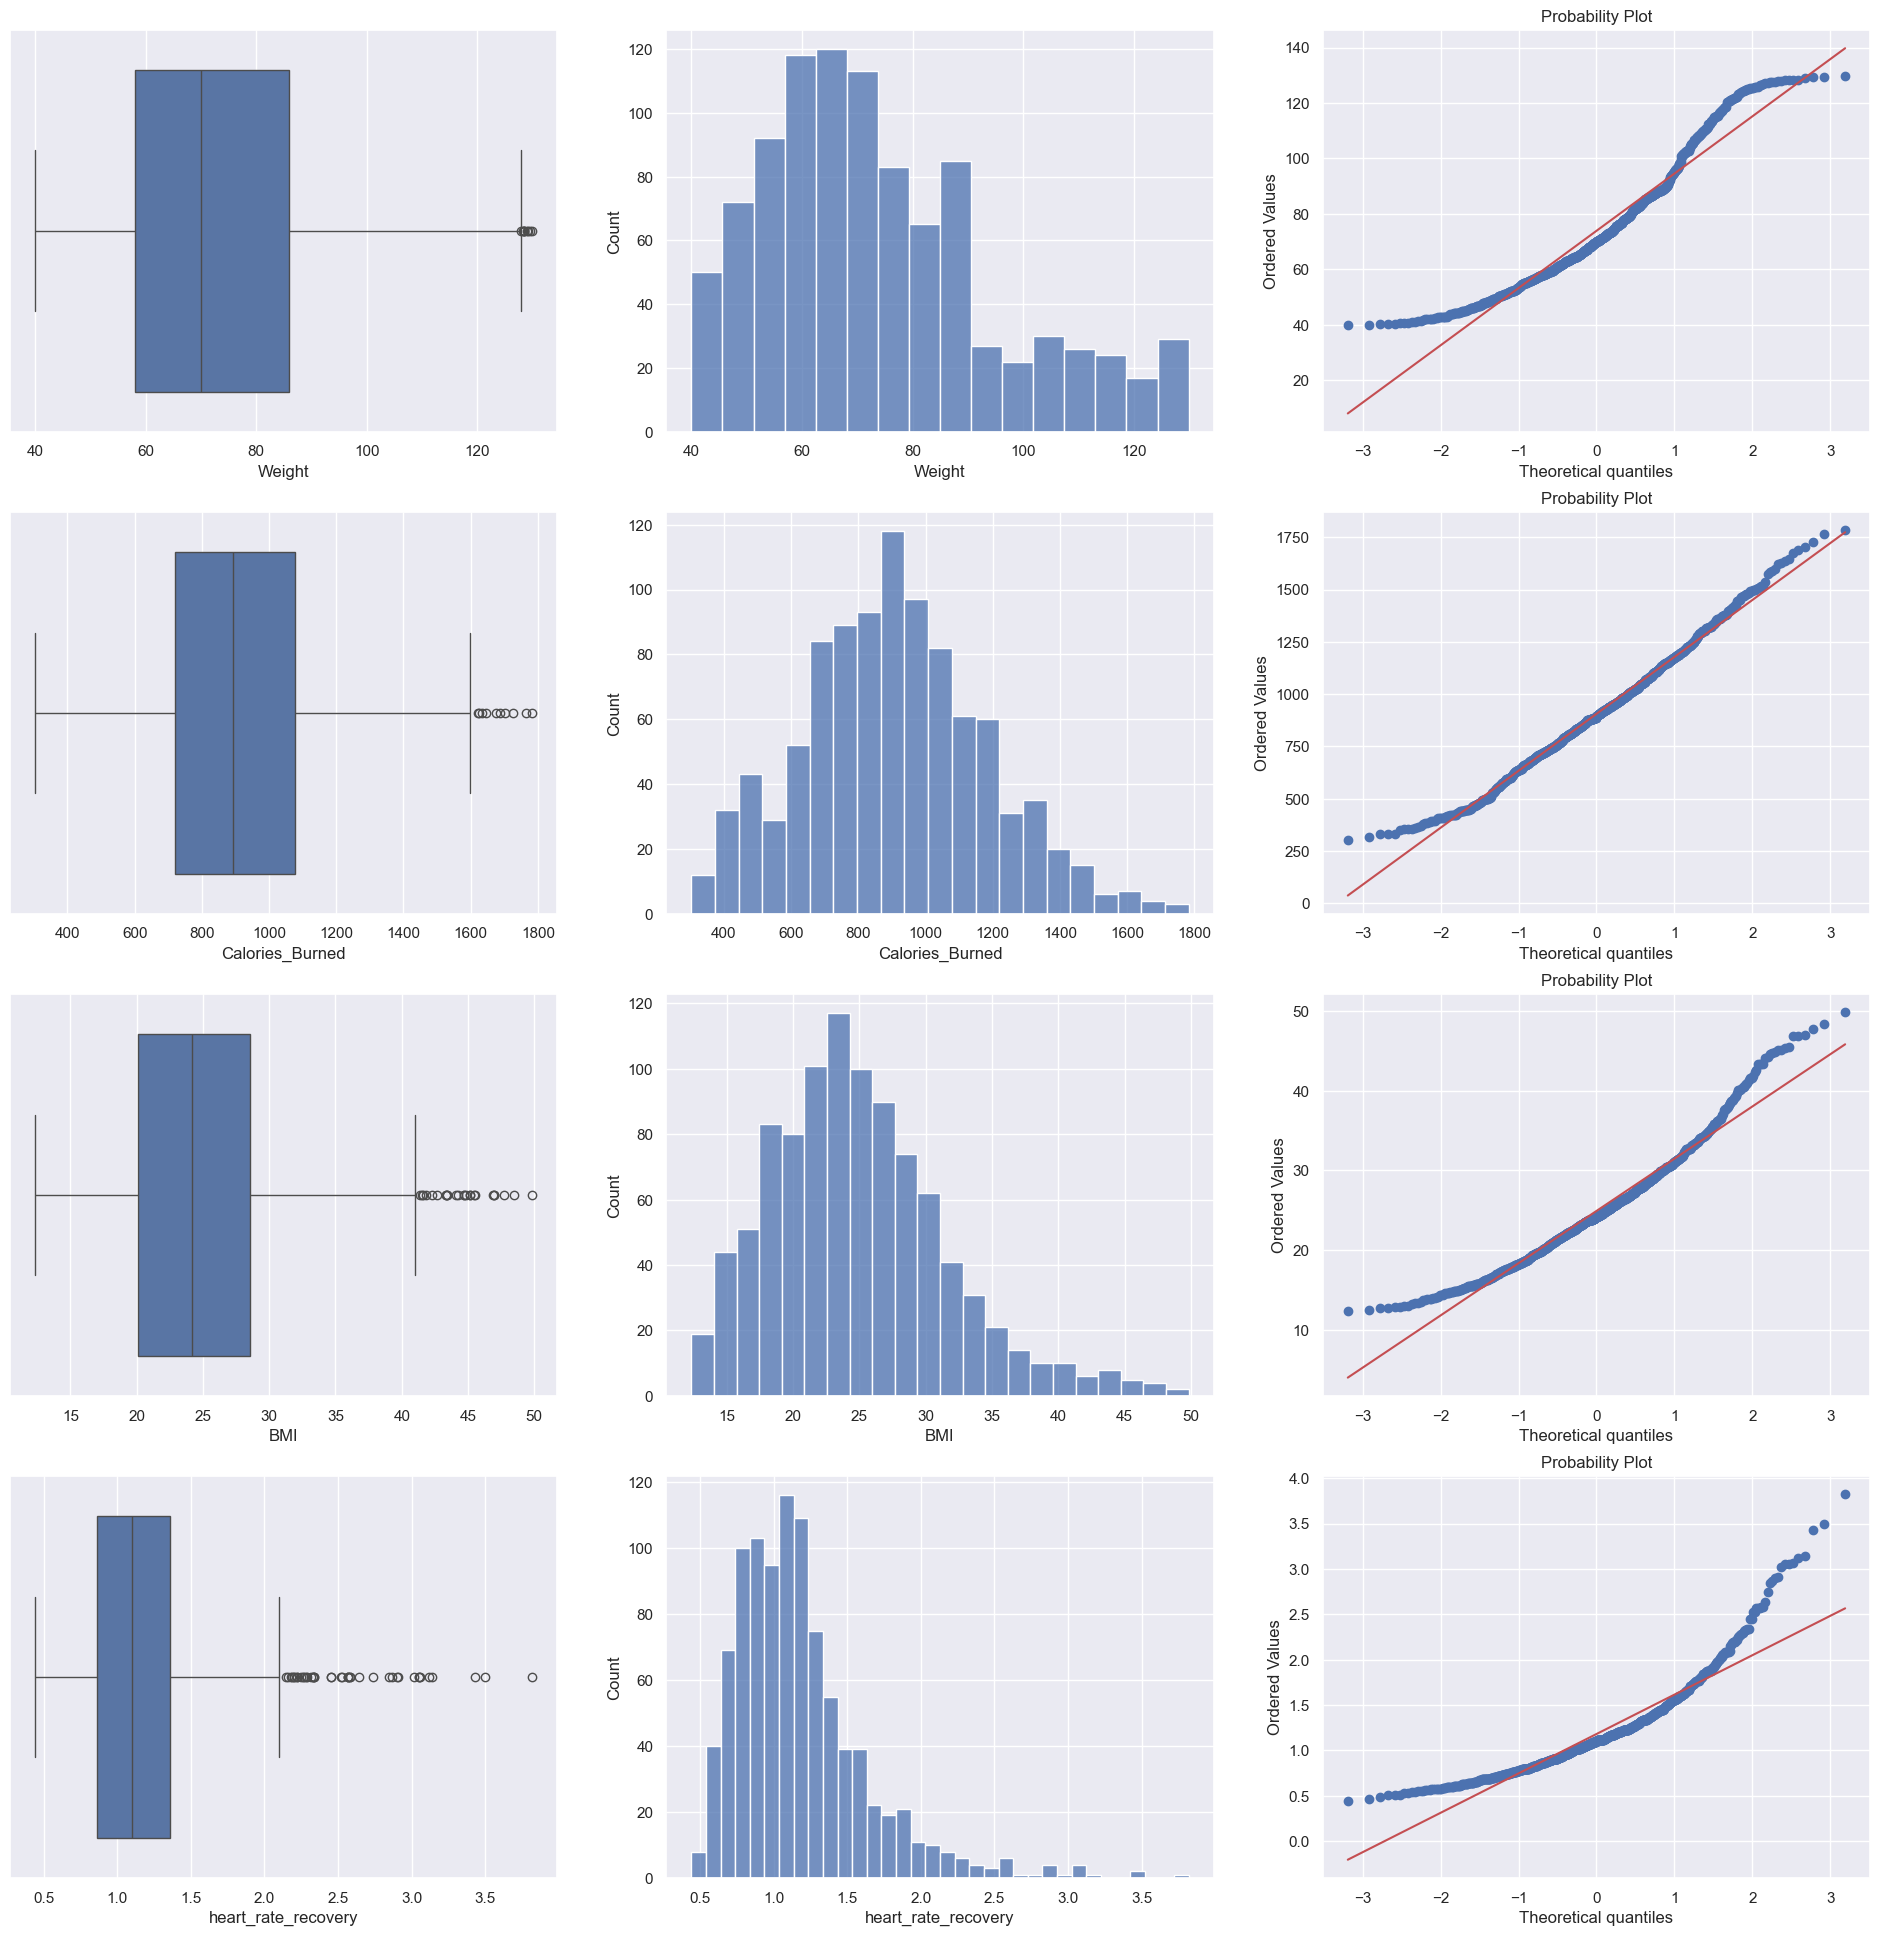

In [21]:
import scipy.stats as stats

outlier_columns = ['Weight', 'Calories_Burned', 'BMI', 'heart_rate_recovery']
exercise_df_outlier = pd.DataFrame(exercise_df[outlier_columns])

f, axes = plt.subplots(len(outlier_columns), 3, figsize=(24, 24))

count = 0
for var in exercise_df_outlier:
    sb.boxplot(exercise_df_outlier[var], orient = "h", ax = axes[count,0])
    sb.histplot(exercise_df_outlier[var], ax = axes[count,1])
    stats.probplot(exercise_df_outlier[var], dist='norm', plot = axes[count,2])
    count += 1

In [22]:
# log transformation: Weight, Calories_Burned, BMI, heart_rate_recovery

exercise_df[outlier_columns] = exercise_df[outlier_columns].apply(lambda x: np.log(x))

exercise_df.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Frequency,BMI,Intensity,avg_calories_burned,heart_rate_reserve,heart_rate_recovery,perceived_intensity,fitness_composite_score
0,56,Male,4.480740,1.71,180,157,60,1.69,7.180070,Yoga,12.6,3.5,4,3.407842,Low,12.95,120,-0.040822,87.22,3.67
1,46,Female,4.316154,1.53,179,151,66,1.30,6.783325,HIIT,33.9,2.1,4,3.465736,High,11.32,113,0.086178,84.36,5.00
2,32,Female,4.220977,1.66,167,122,54,1.11,6.517671,Cardio,33.4,2.3,4,3.207208,Mid,10.17,113,0.019803,73.05,3.67
3,25,Male,3.974058,1.70,190,164,56,0.59,6.276643,Strength,28.8,2.1,3,2.912894,High,15.03,134,1.115142,86.32,2.33
4,38,Male,3.830813,1.79,188,158,68,0.64,6.320768,Strength,29.2,2.8,3,2.666534,High,14.48,120,0.850151,84.04,3.67


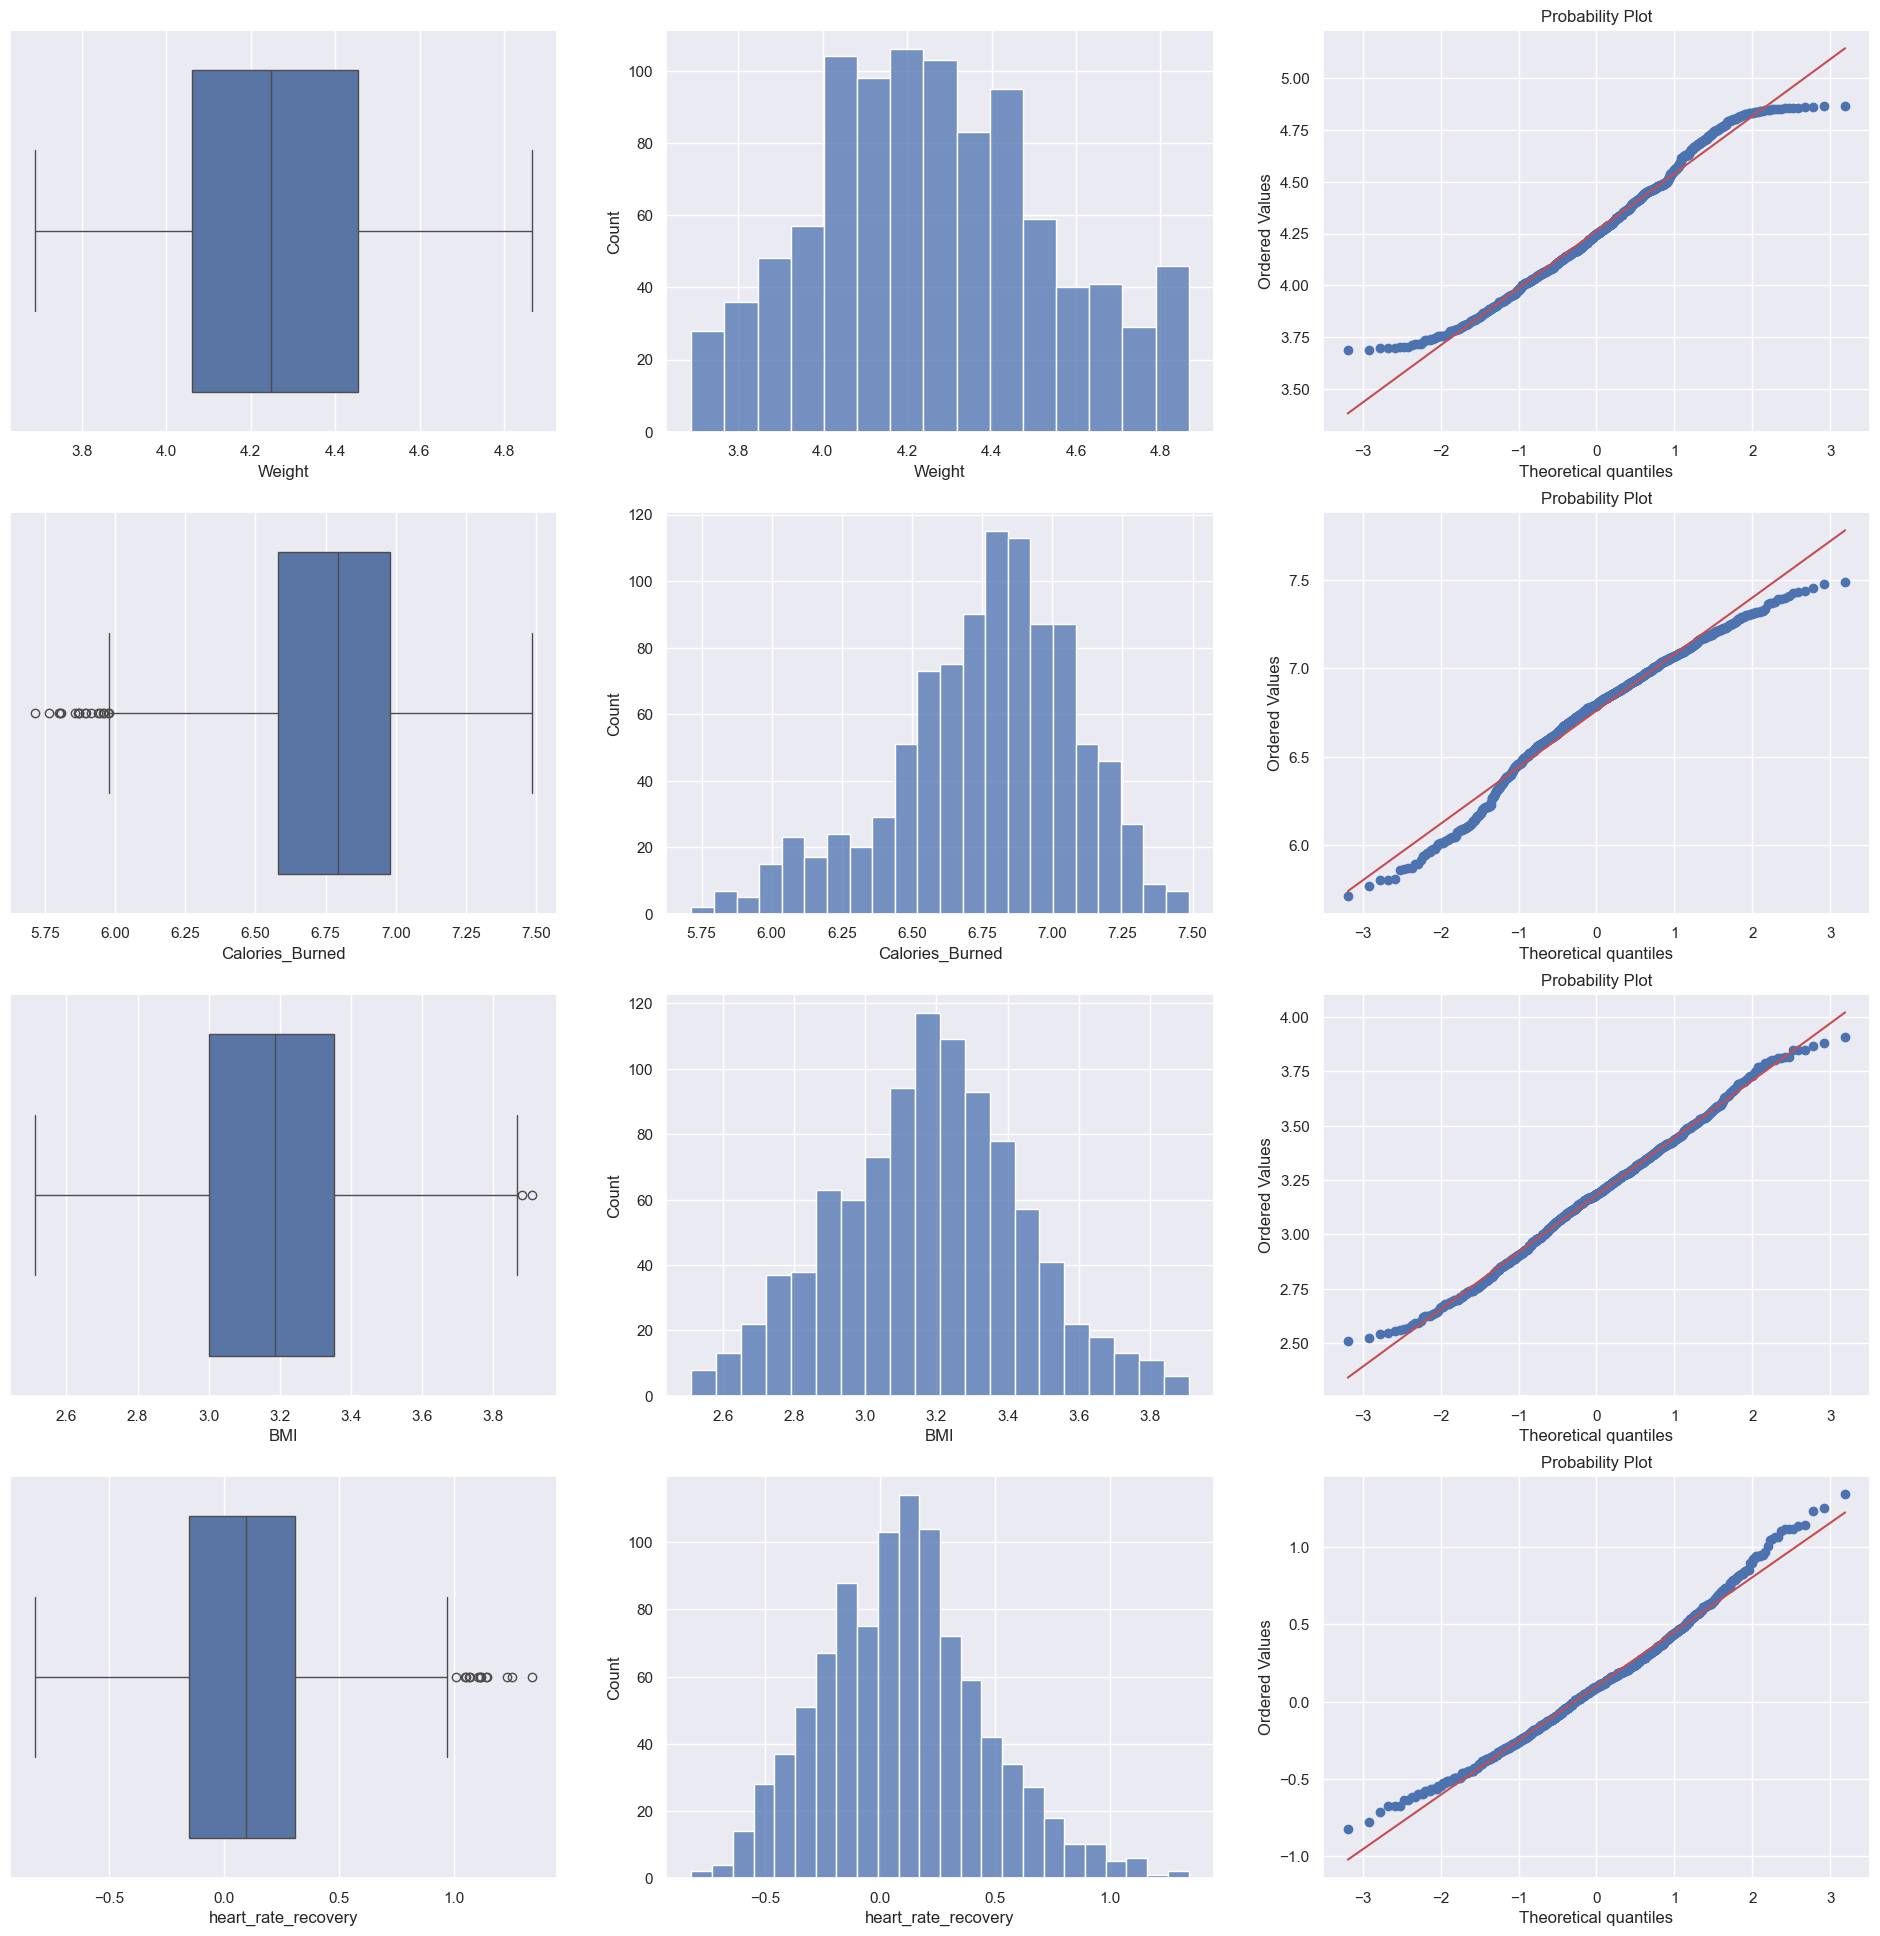

In [24]:
# recheck the transformed columns

exercise_df_outlier = pd.DataFrame(exercise_df[outlier_columns])

f, axes = plt.subplots(len(outlier_columns), 3, figsize=(24, 24))

count = 0
for var in exercise_df_outlier:
    sb.boxplot(exercise_df_outlier[var], orient = "h", ax = axes[count,0])
    sb.histplot(exercise_df_outlier[var], ax = axes[count,1])
    stats.probplot(exercise_df_outlier[var], dist='norm', plot = axes[count,2])
    count+=1

#### Normalization

In [25]:
# Normalisation of some columns namely:

# Age, Weight, Height, Max_BPM, Avg_BPM, Resting_BPM, Duration, Calories_Burned, Water_Intake, BMI
# avg_calories_burned, heart_rate_reserve, heart_rate_recovery, fitness_composite_score

normalise_columns = ['Age', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Duration', 
                     'Calories_Burned', 'avg_calories_burned', 'Fat_Percentage', 'Water_Intake', 
                     'Frequency', 'BMI', 'heart_rate_reserve', 'heart_rate_recovery', 
                     'perceived_intensity', 'fitness_composite_score']

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
exercise_df_final=exercise_df.copy()
exercise_df_final[normalise_columns] = scaler.fit_transform(exercise_df_final[normalise_columns])

exercise_df_final.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Frequency,BMI,Intensity,avg_calories_burned,heart_rate_reserve,heart_rate_recovery,perceived_intensity,fitness_composite_score
0,0.926829,Male,0.672273,0.42,0.512821,0.755102,0.416667,0.793333,0.827355,Yoga,0.104,0.909091,0.666667,0.641544,Low,0.608629,0.539683,0.360979,0.610708,0.6675
1,0.682927,Female,0.532543,0.06,0.487179,0.632653,0.666667,0.533333,0.603499,HIIT,0.956,0.272727,0.666667,0.682968,High,0.357473,0.428571,0.419741,0.545826,1.0000
2,0.341463,Female,0.451740,0.32,0.179487,0.040816,0.166667,0.406667,0.453608,Cardio,0.936,0.363636,0.666667,0.497987,Mid,0.180277,0.428571,0.389030,0.289247,0.6675
3,0.170732,Male,0.242111,0.40,0.769231,0.897959,0.250000,0.060000,0.317612,Strength,0.752,0.272727,0.333333,0.287401,High,0.929122,0.761905,0.895842,0.590290,0.3325
4,0.487805,Male,0.120499,0.58,0.717949,0.775510,0.750000,0.093333,0.342509,Strength,0.768,0.590909,0.333333,0.111126,High,0.844376,0.539683,0.773231,0.538566,0.6675


In [26]:
# # one-hot encoding for Gender, Workout_Type, Intensity

exercise_df_dummies=pd.get_dummies(exercise_df_final[one_hot_columns]).astype(int)
exercise_df_final=pd.concat([exercise_df_final.drop(columns=one_hot_columns), exercise_df_dummies], axis=1)

exercise_df_final.head()

,Age,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Duration,Calories_Burned,Fat_Percentage,Water_Intake,...,fitness_composite_score,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Intensity_High,Intensity_Low,Intensity_Mid
0,0.926829,0.672273,0.42,0.512821,0.755102,0.416667,0.793333,0.827355,0.104,0.909091,...,0.6675,0,1,0,0,0,1,0,1,0
1,0.682927,0.532543,0.06,0.487179,0.632653,0.666667,0.533333,0.603499,0.956,0.272727,...,1.0000,1,0,0,1,0,0,1,0,0
2,0.341463,0.451740,0.32,0.179487,0.040816,0.166667,0.406667,0.453608,0.936,0.363636,...,0.6675,1,0,1,0,0,0,0,0,1
3,0.170732,0.242111,0.40,0.769231,0.897959,0.250000,0.060000,0.317612,0.752,0.272727,...,0.3325,0,1,0,0,1,0,1,0,0
4,0.487805,0.120499,0.58,0.717949,0.775510,0.750000,0.093333,0.342509,0.768,0.590909,...,0.6675,0,1,0,0,1,0,1,0,0


In [27]:
# exercise_df_final.to_csv('../datasets/gym_members_exercise_tracking_v3.csv')